# Cancellation

In [223]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import math as mt
from scipy import special
from scipy import stats
from scipy.stats import chi2,t,norm,bernoulli

π = mt.pi

This is a simple example that shows the impact of the order of how operations are performed may give some stochastic uncertainty into the data. The effect is known as *cancellation* in floating-point numbers, and may be quantified using UQ methods.

In [237]:
dt = np.dtype('float32')  

In [238]:
# Let's create some samples
N = 2000000
μ = 10000
x = np.random.normal(size=N,loc=μ,scale=10000)
x = x.astype(dt)

In [239]:
B=1000
values = np.array([np.random.choice(x, size=len(x), replace=False).mean(dtype=dt) for i in range(B)] )

In [240]:
values-μ

array([1.6210938, 1.6181641, 1.6201172, 1.6220703, 1.6181641, 1.6220703,
       1.6191406, 1.6210938, 1.6220703, 1.6181641, 1.6191406, 1.6201172,
       1.6230469, 1.6191406, 1.6181641, 1.6220703, 1.6210938, 1.6181641,
       1.6210938, 1.6171875, 1.6210938, 1.6171875, 1.6240234, 1.6210938,
       1.6181641, 1.6210938, 1.6201172, 1.6152344, 1.6220703, 1.6230469,
       1.6201172, 1.6181641, 1.6210938, 1.6201172, 1.6240234, 1.6220703,
       1.6191406, 1.6201172, 1.6230469, 1.6181641, 1.6191406, 1.6230469,
       1.6201172, 1.6210938, 1.6210938, 1.6191406, 1.6240234, 1.6210938,
       1.6181641, 1.6210938, 1.6210938, 1.6210938, 1.6240234, 1.6210938,
       1.6191406, 1.6201172, 1.6201172, 1.6240234, 1.6201172, 1.6201172,
       1.6240234, 1.6152344, 1.6230469, 1.6230469, 1.6171875, 1.6240234,
       1.6230469, 1.6220703, 1.6191406, 1.6210938, 1.6210938, 1.6210938,
       1.6259766, 1.6191406, 1.6201172, 1.6152344, 1.6230469, 1.6230469,
       1.6230469, 1.6191406, 1.6201172, 1.6201172, 

<IPython.core.display.Javascript object>


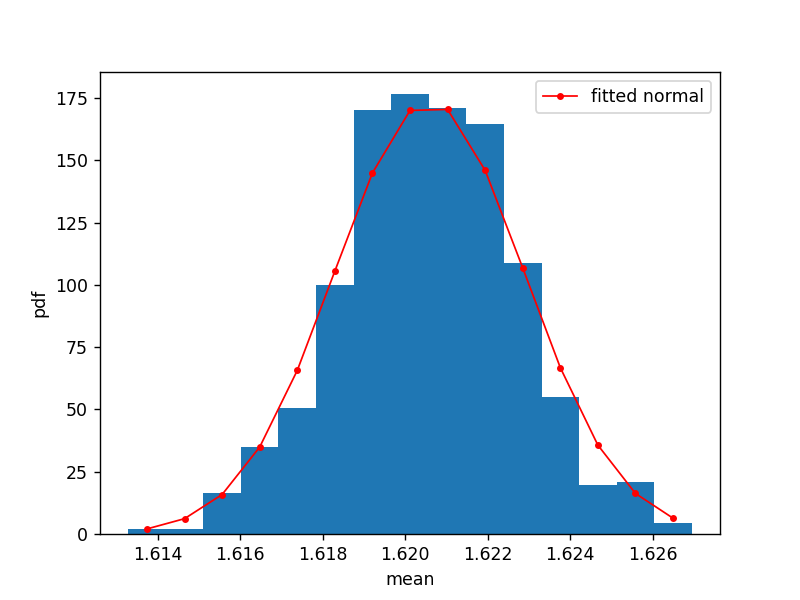

In [241]:
nbins = 15  # number of bins

mm = values-μ
plt.figure()
count, bins, ignored = plt.hist(mm, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, norm.pdf(bc,np.mean(mm),np.std(mm)), '.-',linewidth=1, color='r',label='fitted normal')

plt.xlabel('mean');plt.ylabel('pdf')
plt.legend()
plt.show()


In [242]:
# "correct" mean
i=np.argsort(abs(x))
np.mean(x[i])-μ

1.6220703125

In [243]:
np.mean(mm)

1.6205869

The relative error is significant (about $10^{-3}) just based on the summation of 2 million (badly scaled) floats.

In [244]:
(np.mean(x[i])-μ-np.mean(mm))/np.mean(mm)

0.0009153723411611252